<a href="https://colab.research.google.com/github/m7moud27/mahmoud-reda/blob/master/num_finger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd / gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/ gdrive'
/content


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time



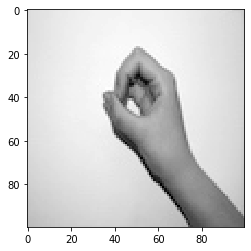

In [8]:
DATADIR = r'/gdrive/My Drive/num'
CATEGORIES = ['0', '1', '2','3', '4', '5',"6","7",'8','9']

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show()  

        break   
    break  

In [9]:
print(img_array)


[[180 181 183 ... 168 167 166]
 [180 182 183 ... 173 169 167]
 [180 182 183 ... 175 170 166]
 ...
 [155 156 157 ...  87  85  85]
 [154 156 156 ...  88  86  84]
 [154 155 155 ...  89  86  84]]


In [10]:
print(img_array.shape)

(100, 100)


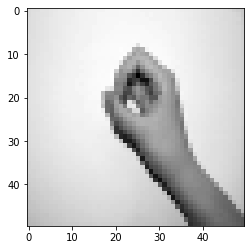

In [31]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [32]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 204/204 [00:00<00:00, 488.21it/s]

2062


In [33]:
import random
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

9
2
6
3
0
0
2
8
1
3


In [34]:

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[133]
   [135]
   [138]
   ...
   [134]
   [130]
   [127]]

  [[134]
   [138]
   [141]
   ...
   [136]
   [133]
   [129]]

  [[137]
   [141]
   [146]
   ...
   [138]
   [135]
   [131]]

  ...

  [[121]
   [123]
   [126]
   ...
   [117]
   [115]
   [113]]

  [[118]
   [122]
   [124]
   ...
   [114]
   [112]
   [111]]

  [[116]
   [120]
   [122]
   ...
   [110]
   [110]
   [109]]]]


In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X = X/255.0

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [51]:
for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPool2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPool2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=10,
                      epochs=3,
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('num_finger.model')


1-conv-32-nodes-0-dense-1582073313
Train on 1443 samples, validate on 619 samples
Epoch 1/3
1443/1443 [==============================] - 2s 1ms/sample - loss: -4017.7927 - acc: 0.0998 - val_loss: -14867.1784 - val_acc: 0.0969
Epoch 2/3
1443/1443 [==============================] - 1s 480us/sample - loss: -36500.3207 - acc: 0.1012 - val_loss: -71528.4930 - val_acc: 0.0969
Epoch 3/3
1443/1443 [==============================] - 1s 491us/sample - loss: -108678.2729 - acc: 0.1012 - val_loss: -170070.1049 - val_acc: 0.0969
2-conv-32-nodes-0-dense-1582073320
Train on 1443 samples, validate on 619 samples
Epoch 1/3
1443/1443 [==============================] - 2s 1ms/sample - loss: -23421.9008 - acc: 0.1012 - val_loss: -127002.5909 - val_acc: 0.0969
Epoch 2/3
1443/1443 [==============================] - 1s 533us/sample - loss: -595849.4406 - acc: 0.1012 - val_loss: -1531364.9259 - val_acc: 0.0969
Epoch 3/3
1443/1443 [==============================] - 1s 557us/sample - loss: -3102850.7551 - acc: 

[[1.]]
1


<function matplotlib.pyplot.show>

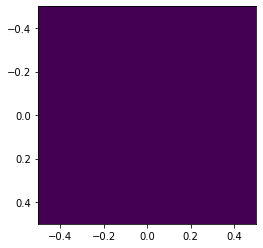

In [66]:
filepath='/content/IMG_1119.JPG'
def prepare(filepath):
    IMG_SIZE = 50 # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model('num_finger.model')

prediction = model.predict([prepare(filepath)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])
plt.imshow(prediction)
plt.show